https://plot.ly/python/reference/#layout-updatemenus

In [1]:
import ANEMO.ANEMO as A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
x=np.arange(35)

T0,  t1,  t2,  tr = 0, 15, 10, 1
x_0, x1, x2, tau = 0, 2, 1, 13

fit = A.Equation.fct_saccade(x, x_0, tau, x1, x2, T0, t1, t2, tr,do_whitening=False)


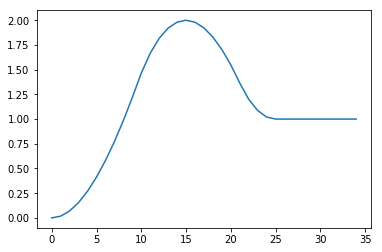

In [4]:
plt.plot(x, fit)

In [5]:
# step 1
list_tau = np.linspace(5, 40, 5)
list_T0 = np.linspace(-15, 10, 5)
list_t1 = np.linspace(10, 20, 5)
list_x1 = np.linspace(-5, 5, 5)

# step 2
list_t2 = np.linspace(10, 20, 5)
list_tr = np.linspace(0, 15, 5)
list_x_0 = np.linspace(-0.1, 0.1, 5)
list_x2 = np.linspace(-5, 5, 5)


In [6]:
param = dict(x=x,
             T0=T0, t1=t1, t2=t2, tr=tr,
             x_0=x_0, x1=x1, x2=x2,
             tau=tau)


def generat_data(do_whitening=False) :
    
    data = []
    
    for var, liste in zip(['tau', 'T0', 't1', 'x1', 't2', 'tr', 'x_0', 'x2'],
                          [list_tau, list_T0, list_t1, list_x1, list_t2, list_tr, list_x_0, list_x2]):
        
        for a in range(len(liste)) :
            new_param = param.copy()
            new_param[var] = liste[a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=1),
                             x=x, y=list(A.Equation.fct_saccade(**new_param))))
    
   
    return data

In [7]:
data_false = generat_data(do_whitening=False)
#data_true = generat_data(do_whitening=True)

In [8]:
sliders=[]
d, t = 0, 0

for var, liste in zip(['tau', 'T0', 't1', 'x1', 't2', 'tr', 'x_0', 'x2'],
                      [list_tau, list_T0, list_t1, list_x1, list_t2, list_tr, list_x_0, list_x2]):
    
    dic = []
    for a in range(len(liste)) :
        if var=='x_0' :
            di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                      label='%0.2f'%(liste[a]))
        else :
            di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                         label = str(int(liste[a])))
        di['args'][1][d] = True
        dic.append(di)
        d=d+1
    
    '''if var == 'tau' :
        pre = "<b>Step 1:</b> <br> %s: "%var
    
    elif var == 't2' :
        t=t+35
        pre = "<b>Step 2:</b> <br> %s: "%var
    else :
        pre = "%s: "%var'''
    
    pre = "<b>%s :</b> "%var
    sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=1),
                        active = len(liste),
                        currentvalue = {"prefix": pre, 'font':{'size':15, 'family':"Open Sans"}},
                        pad = {"t": t-10, 'b': 1}, len=0.4, steps = dic,
                        bgcolor='#BABABA', bordercolor='#BABABA', borderwidth=0))
    
    #if var in ['latency', 'start_anti'] :
    #    t=t+10

    t=t+50 #65

layout = go.Layout(title="Fonction Saccade", titlefont={'size':20, 'family':"Open Sans"},
                xaxis=dict(title='Time (ms)', range=[-10, 50], tickfont={'size':10}),
                yaxis=dict(title='Velocity (°/s)',range=[-6, 6], tickfont={'size':10}),
                sliders=sliders,  showlegend=False, font={'size':15, 'family':"Open Sans"})
                


data = data_false #+ data_true

'''vis = [False]+[True]+[False]*(len(data_false)-2)

updatemenus = list([
            dict(type = 'buttons',
                  direction = 'left', x = -0.5, y = 1.2,
                  active=-1, showactive = True,
                  xanchor = 'left', yanchor = 'bottom',
                  buttons=list([
                      dict(label = 'T/F', method = 'restyle',
                           args = [{'visible':vis+vis,
                                    'y': [data[i]['y'] for i in range(len(data))]}]),
                      dict(label = 'False', method = 'restyle',
                           args = [{'visible':vis,
                                    'y': [data_false[i]['y'] for i in range(len(data_false))]}]),
                      dict(label = 'True', method = 'restyle',
                           args=[{'visible':vis,
                                  'y': [data_true[i]['y'] for i in range(len(data_true))]}])]))
        ])


annotations = list([dict(text='do_whitening:', x=-0.7, y=1.2, yref='paper',xref='paper',
                         align='left', yanchor='bottom', showarrow=False, font={'size':15}) ])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations'''

config = {'showLink':False,
          'displaylogo':False,
         'modeBarButtonsToRemove':['zoom2d', 'pan2d', 'toImage',
                                   'toggleSpikelines','hoverClosestCartesian',
                                   'hoverCompareCartesian', 'sendDataToCloud']}

fig = go.Figure(data=data, layout=layout)

iplot(fig, config=config)

In [9]:
plot(fig, filename='../docs/source/_static/Fct_saccade.html', auto_open=False, config=config)

'file:///home/drone/Bureau/Git/ANEMO/docs/source/_static/Fct_saccade.html'